## __XGBoost__

In [55]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from sklearn.preprocessing import MinMaxScaler    
from torch.utils.data import Dataset, DataLoader # 파이토치 기반 딥러닝 사용 안 해도 쓸 수 있는 도구임.

import xgboost as xgb

In [56]:
df = pd.read_csv('D:/Github/DeepLearning/Data/pv.csv')
df = df.loc[:, 'hour':]

print(df.shape)

(26280, 7)


In [57]:
df.head()

,hour,dhi,dni,windspeed,humidity,temp,pv
0,0,0.0,0.0,1.50,69.070,-12.0,0.0
1,1,0.0,0.0,1.60,71.765,-12.0,0.0
2,2,0.0,0.0,1.55,72.245,-11.5,0.0
3,3,0.0,0.0,1.45,72.555,-11.0,0.0
4,4,0.0,0.0,1.30,74.615,-11.0,0.0


## __Preprocessing__

In [58]:
xtrain = df.iloc[:-24*365, :-1].values
ytrain = df.iloc[:-24*365, -1].values.reshape(-1, 1)

xtest = df.iloc[-24*365:, :-1].values
ytest = df.iloc[-24*365:, -1].values.reshape(-1, 1)

## __Model__

In [59]:
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000)

In [60]:
model.fit(xtrain, ytrain, verbose=False) # verbose=False : 학습 과정 출력 안 함.

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## __Inference__

In [61]:
ypred = model.predict(xtest)

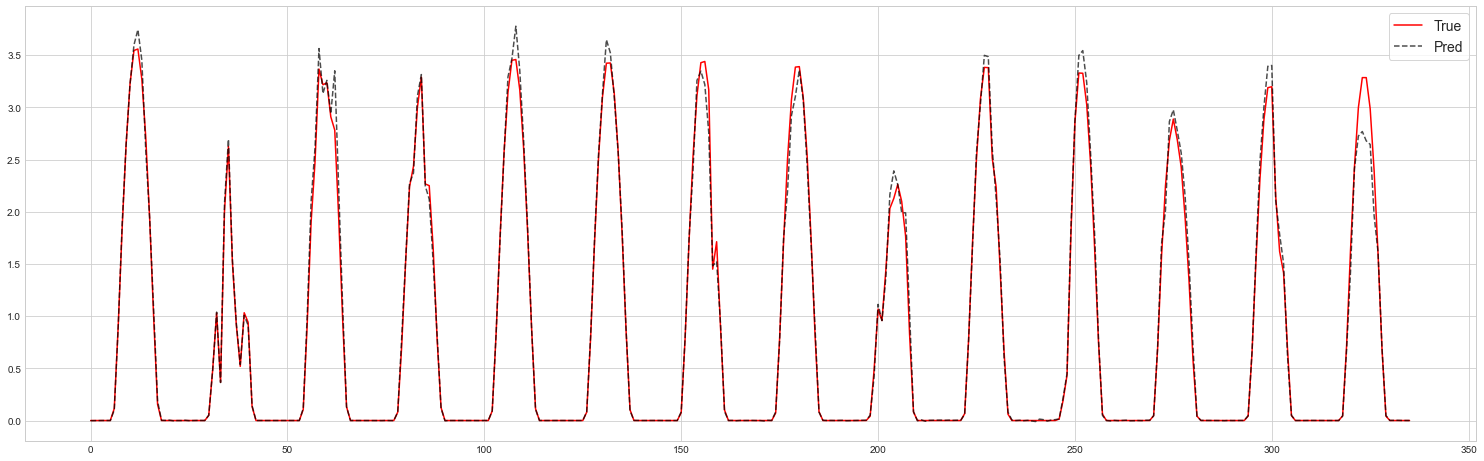

In [67]:
s = 24*280
e = s + 24*14

fig, ax = plt.subplots(1,1, figsize=(26,8))

ax.plot(range(24*14), ytest.ravel()[s:e], color='r', label='True')
ax.plot(range(24*14), ypred[s:e], color='k', linestyle='dashed', label='Pred', alpha=0.7)

plt.legend(frameon=True, fontsize=14)

plt.show()